# Part I - GoBike Data Exploration
## by Ebele-Muolokwu Nonso

## Introduction
 This data set contains 183,412, and 16 columns. A summary of the columns can be seen below
- __duration_sec__ : Duration of trip in second
- __start_time__ : Time the trip started 
- __end_time__ : Time the trip started 
- __start_station_id__: Station ID wherethe trip started
- __start_station_name__: Station name where the trip started
- __start_station_latitude, start_station_longitude__ : Geogrphical Latitude and Longitude of where the trip started
- __end_station_id__: Station ID where the trip end
- __end_station_name__: Station name where the trip ended
- __end_station_latitude ,end_station_longitude__ : Geogrphical Latitude and Longitude of where the trip ended
- __bike_id__ : ID of bike used during the trip
- __user_type__: Categorical column that if the trip is done by a user or customer
- member_birth_year : Member birth year
- member_gender: Gender of the rider
- __bike_share_for_all_trip__: A Yes/No Column stating ig=f the trip was shared

There are 9 numerical column, 2 datetime, 4 object type and 1 is boolean type column.


> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [1]:
!pip install geopy

In [2]:
!pip install plotly

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly
import datetime as dt

pd.set_option('display.max_columns', 200)

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [4]:
df = pd.read_csv('tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
# Check values in eac columns
print(df.nunique())

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64


In [6]:

df.isna().sum()/df.shape[0]*100

duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_id           0.107408
start_station_name         0.107408
start_station_latitude     0.000000
start_station_longitude    0.000000
end_station_id             0.107408
end_station_name           0.107408
end_station_latitude       0.000000
end_station_longitude      0.000000
bike_id                    0.000000
user_type                  0.000000
member_birth_year          4.506248
member_gender              4.506248
bike_share_for_all_trip    0.000000
dtype: float64

## Data Cleaning


##Issue #1 Missing Values
Since this project is not a data cleaning and wrangling project. The rows of null values were dropped on all columns. Columns with null values include **start_station_id, start_station_name, end_station_id , end_station_name, member_birth_year, member_gender columns**


##### Define:
Droping of cellentries with missing values


In [7]:
df.dropna(inplace=True)


In [8]:
#changing data type of start_time and end_time to datetime.
df['end_time'] = pd.to_datetime(df.end_time)
df['start_time'] = pd.to_datetime(df.start_time)
#Changing the start_station_id and end_station_id to strings
df['start_station_id'] = df.start_station_id.astype(str).str[:-2]
df['end_station_id'] = df.end_station_id.astype(str).str[:-2]


In [9]:

# Extracting Day and month and hour name from datetime columns
df['start_day'] = df['start_time'].dt.day_name()
df['start_month'] = df['start_time'].dt.month_name()

df['start_hr'] = df['start_time'].dt.hour
df['start_hr'] = df.start_hr.astype(str)

df['end_day'] = df['end_time'].dt.day_name()
df['end_month'] = df['end_time'].dt.month_name()
df['end_hr'] = df['end_time'].dt.hour
df['end_hr'] = df.end_hr.astype(str)

#Extracting age from the birthdate column
df.member_birth_year = pd.to_datetime(df.member_birth_year.astype(str).str[:-2].replace('n', np.nan))
df['age'] = df.start_time.dt.year - df.member_birth_year.dt.year
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_month,start_hr,end_day,end_month,end_hr,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984-01-01,Male,No,Thursday,February,17,Friday,March,8,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972-01-01,Male,No,Thursday,February,12,Friday,March,5,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989-01-01,Other,No,Thursday,February,17,Friday,March,4,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974-01-01,Male,Yes,Thursday,February,23,Friday,March,0,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959-01-01,Male,No,Thursday,February,23,Friday,March,0,60


In [10]:
df['age_bin'] = pd.cut(x=df['age'], bins=[1, 35, 60, 141], labels=['Young','Middle_aged', 'Old'] )
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_month,start_hr,end_day,end_month,end_hr,age,age_bin
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984-01-01,Male,No,Thursday,February,17,Friday,March,8,35,Young
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972-01-01,Male,No,Thursday,February,12,Friday,March,5,47,Middle_aged
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989-01-01,Other,No,Thursday,February,17,Friday,March,4,30,Young
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974-01-01,Male,Yes,Thursday,February,23,Friday,March,0,45,Middle_aged
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959-01-01,Male,No,Thursday,February,23,Friday,March,0,60,Middle_aged


In [11]:
from geopy.distance import great_circle as GRC

df['avg_distance'] = df[['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude']].apply(lambda x: GRC((x.start_station_latitude,x.start_station_longitude),
                                          (x.end_station_latitude,x.end_station_longitude)).km, axis=1)
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_month,start_hr,end_day,end_month,end_hr,age,age_bin,avg_distance
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984-01-01,Male,No,Thursday,February,17,Friday,March,8,35,Young,0.544709
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972-01-01,Male,No,Thursday,February,12,Friday,March,5,47,Middle_aged,2.704549
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989-01-01,Other,No,Thursday,February,17,Friday,March,4,30,Young,0.260739
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974-01-01,Male,Yes,Thursday,February,23,Friday,March,0,45,Middle_aged,2.409305
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959-01-01,Male,No,Thursday,February,23,Friday,March,0,60,Middle_aged,3.332207


In [12]:
df.bike_share_for_all_trip.unique()

array(['No', 'Yes'], dtype=object)

### What is the structure of your dataset?

> This data set contains 183,412, and 16 columns

### What is/are the main feature(s) of interest in your dataset?

> I am intrested in the relationship between the time taken to finish trips and other attributes contained in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> From visual analysis, I expect that trip duration to be dependent on day of week, time of the day, The birthyear, and usertype and gender will affect the average time taken .

## Univariate Exploration

We would explore single variables, starting from the main variable of contention


## What is the distribution of time taken to complete a trip?

## Visualization

(0, 10000)

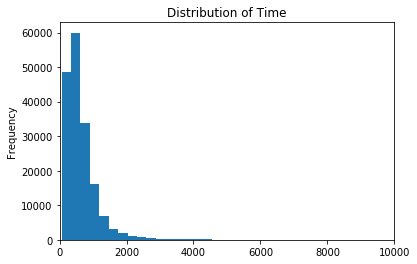

In [13]:
df.duration_sec.plot(kind='hist', bins=300, title='Distribution of Time')
plt.xlim(0, 10000)


The distribution is right skewed with a long tail, it is scaled with numpy log function to visuaize the distribution

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2923: UserWarning:

Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.



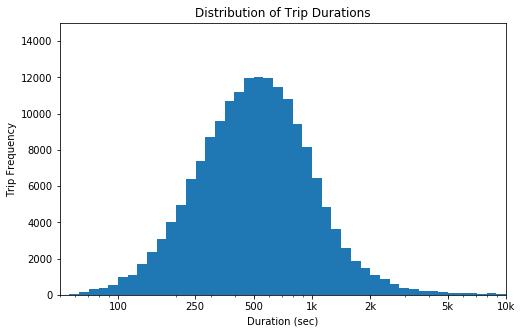

In [14]:
log_binsize = 0.05
log_bins = 10 ** np.arange(1.7, np.log10(df['duration_sec'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = log_bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (sec)')
plt.ylabel('Trip Frequency')
plt.xscale('log')
plt.xticks([100, 250, 500, 1e3, 2e3, 5e3, 1e4], [100,250,500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 15000])
plt.show()

## Observation

Trip duration is mostly concentrated on the lower spectrum.  Most of the values are less than 2000 seconds with peak around 700 seconds. Trip duration values first increases starting from arount 8000 values at 0 to 12500 values at around 600 but then starts to fall and raching below 2000 values under 2000 sec.



## What is counts of rides taken during the days of the week?


## Visualization

In [15]:
ordinal_var_list = [['end_hr', [str(x) for x in range(0,24)]],
                    ['end_day', ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday']],
                   ['start_hr',[str(x) for x in range(0,24)]],
                   ['start_day', ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday']]]

for var, order in ordinal_var_list:
    order_variable = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = order)
    df[var] = df[var].astype(order_variable)

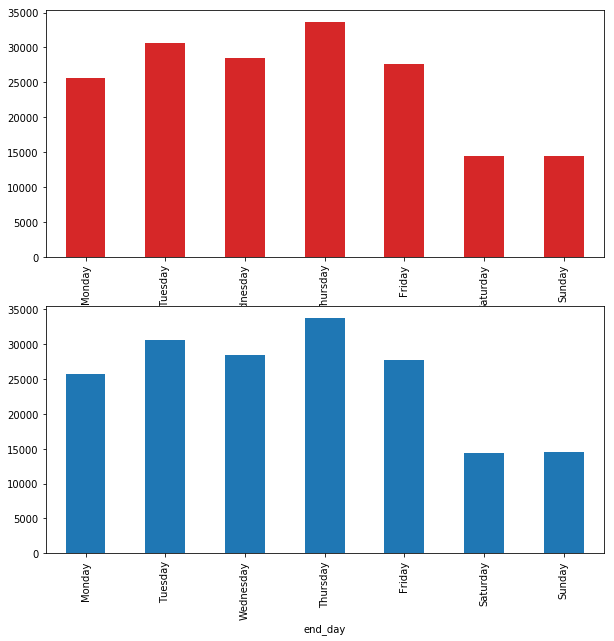

In [16]:
# ride frequency per days

default_color = sb.color_palette()[0]
fig, ax = plt.subplots(2, figsize = [10,10])

color = sb.color_palette()[3]
color1 = sb.color_palette()[2]
df.groupby('start_day')['end_hr'].count().reset_index().set_index('start_day')\
                                            .plot(kind='bar', ax = ax[0], color= color, legend=None)

df.groupby('end_day')['start_day'].count().reset_index()\
                        .set_index('end_day').plot(kind='bar', ax = ax[1], legend=None);



plt.show()

### Observations
From the plots its is observed that most rides are taken on Tuesday and Thursdays while the least rides are taken during during the weekend

## At what time are most rides started?

## Visualization

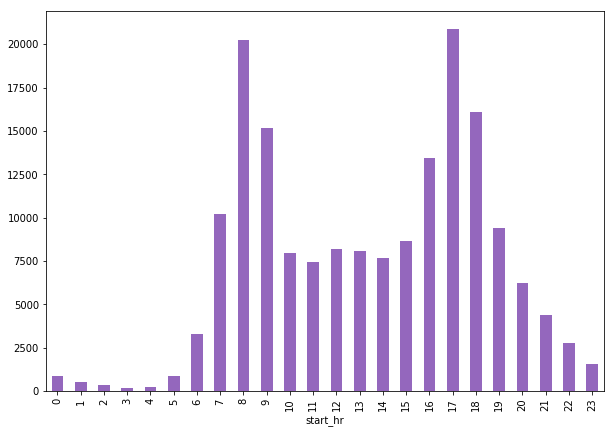

In [17]:
fig, ax = plt.subplots(figsize = [10,7])

default_color = sb.color_palette()[0]
df.groupby('start_hr')['end_hr'].count().reset_index().set_index('start_hr').plot(kind='bar', ax = ax, legend=None,
                                                                                 color = sb.color_palette()[4]);




## Observation
As observed for the days, the 8th, 9th, 17th and 18th hours have the highest trip records. This is expected as it can be linked to morning rush and closing hour from work.

The 3rd and 4th hours have the least trip records.

## What is is the distribution of the distance travelled
The distance travelled might not be accurate because of the way it is calculated. In the real world scenerio distance is not a straight line but a connection of paths

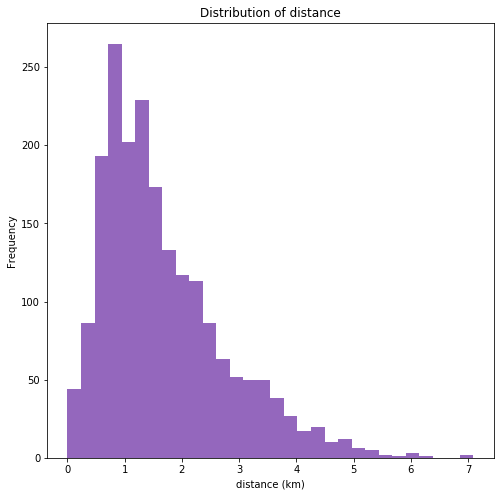

In [18]:
df.avg_distance = df.avg_distance.round(3)
plt.figure(figsize=(8,8))
df.sample(2000).avg_distance.plot(kind='hist', bins= 30, title='Distribution of distance', color = sb.color_palette()[4])
plt.xlabel('distance (km)');

## Observation
The plot is skewed to the right with a very long tail, The mean distance is 1km. It skews towards the rightwith some outliers

## Which month has the most rides

## Visualization

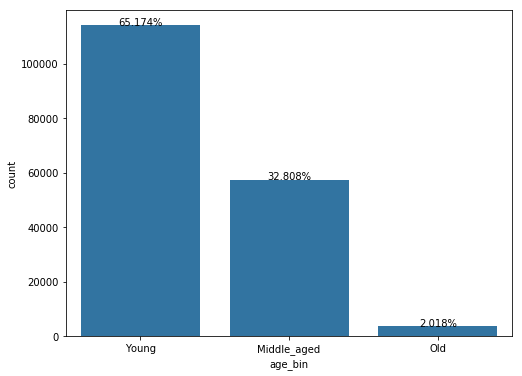

In [19]:
fig, ax = plt.subplots(figsize=(8,6))

default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'age_bin', color = default_color,  ax = ax)
        
# trip end frequency per day
for p in ax.patches:
    percent = 100 * p.get_height()/len(df)
    percentage = '{:.3f}%'.format(percent)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+10
    ax.annotate(percentage, (x, y),ha='center')
plt.show();


## Observation
From the above plot, it can be seen that most of the trips were taken by Yougling followed by Middle Aged Then Old Folks. This ratio is really large.

## What is ratio of the different genders in the dataset?

## Visualization

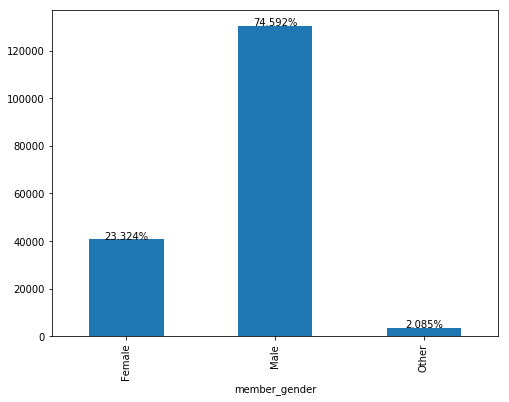

In [20]:
fig, ax = plt.subplots(figsize=(8,6))

df.groupby('member_gender')['end_hr'].count().reset_index().set_index('member_gender')\
                                            .plot(kind='bar', ax = ax,  legend=None)

        

for p in ax.patches:
    percent = 100 * p.get_height()/len(df)
    percentage = '{:.3f}%'.format(percent)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+10
    ax.annotate(percentage, (x, y), ha='center')
plt.show();

## Observation
From the above plot, it can be seen that most of the bike users are male with a percentage of 75% followed by female with a percentage of 23% then others

## What percentage of riders share their trips?

## Visualization

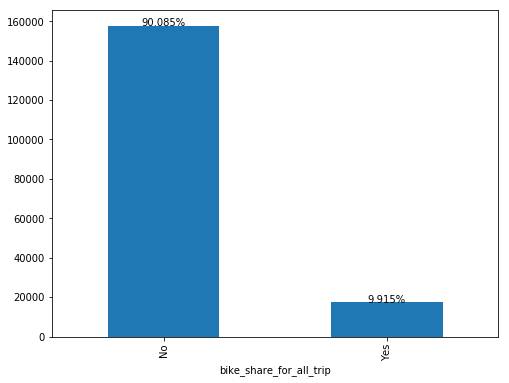

In [21]:
# ride frequency per bike_share_for_all_trip

fig, ax = plt.subplots(figsize=(8,6))

df.groupby('bike_share_for_all_trip')['end_hr'].count().reset_index()\
                    .set_index('bike_share_for_all_trip').plot(kind='bar', ax = ax,  legend=None)

for p in ax.patches:
    percent = 100 * p.get_height()/len(df)
    percentage = '{:.3f}%'.format(percent)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+10
    ax.annotate(percentage, (x, y), ha='center')
plt.show();

## Observation
From the plot it can be deduced that most riders don't like sharing their trips during the ride. This might be due to security purposes 

## At what station are most of the rides started?

## Visualization

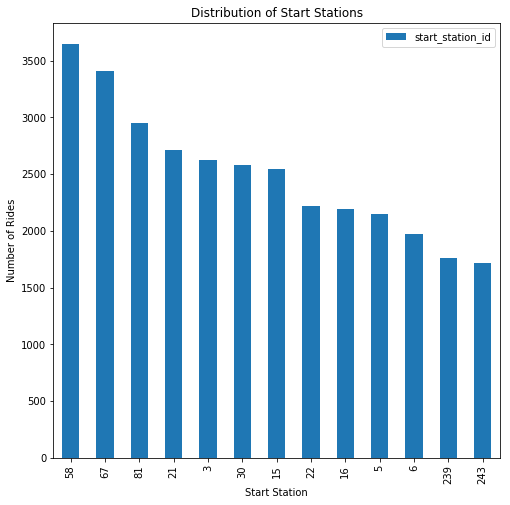

In [22]:
# Plotting start station id distribution.

df.start_station_id.value_counts().reset_index().loc[:12].set_index('index').plot(kind='bar',figsize= (8,8))
plt.title('Distribution of Start Stations')
plt.xlabel('Start Station')
plt.ylabel('Number of Rides')
plt.show()

## Observations
It can be seen from the plot that most of the rides are take in station 58, 67 and 81

## At what station are most of the rides ended?

## Visualization

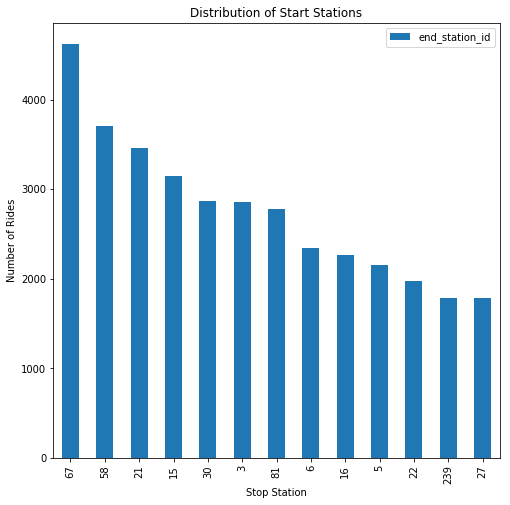

In [23]:
df.end_station_id.value_counts().reset_index().loc[:12].set_index('index').plot(kind='bar',figsize= (8,8))
plt.title('Distribution of Start Stations')
plt.xlabel('Stop Station')
plt.ylabel('Number of Rides')
plt.show()

## Observations
It can be seen from the plot that most of the rides are take in station 67, 58 and 32

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>The service is used mostly by subscribers, male and most people that use the dont like sharing their location hehe

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [24]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'start_day', 'start_month', 'start_hr', 'end_day', 'end_month',
       'end_hr', 'age', 'age_bin', 'avg_distance'],
      dtype='object')

## Is there a relationship between distance and time taken

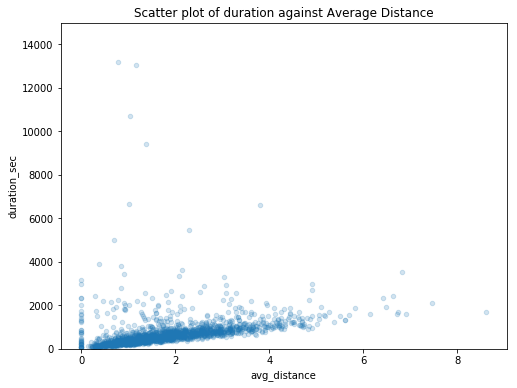

In [25]:
fig,ax = plt.subplots(figsize=(8,6))
df.sample(2000).plot(kind='scatter', x= 'avg_distance', y= 'duration_sec', ax=ax,alpha= 0.2,
                        title= 'Scatter plot of duration against Average Distance')
plt.ylim(0, 15000);

## Observations
The distance and duration is linearly correlated which is expected but there are lots of outliers in the plot

## What is the relationship between ride duration and user_type, member_gender?

## Visualization

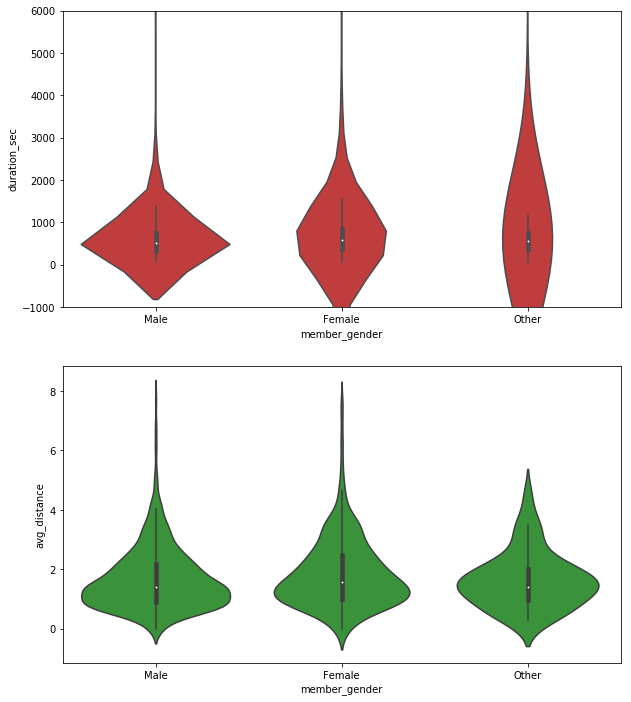

In [26]:

df_sample = df.sample(2000)
fig,ax = plt.subplots(2, figsize=(10,12))

sb.violinplot(data=df_sample, x='member_gender', y='duration_sec', color = color, ax=ax[0])
sb.violinplot(data=df_sample, x='member_gender', y='avg_distance', color = color1, ax=ax[1])

ax[0].set_ylim([-1000, 6000])
plt.show()

## Observation
- Customers spend more time on a trip in comparism to subscriber
- The average time spent is almost equal amongst male, female, other
- There are negative entries in the dataset that need to be seen

In [27]:
df.query('avg_distance<0')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_month,start_hr,end_day,end_month,end_hr,age,age_bin,avg_distance


## What average time taken to complete bike trips during the week?

## Visualization

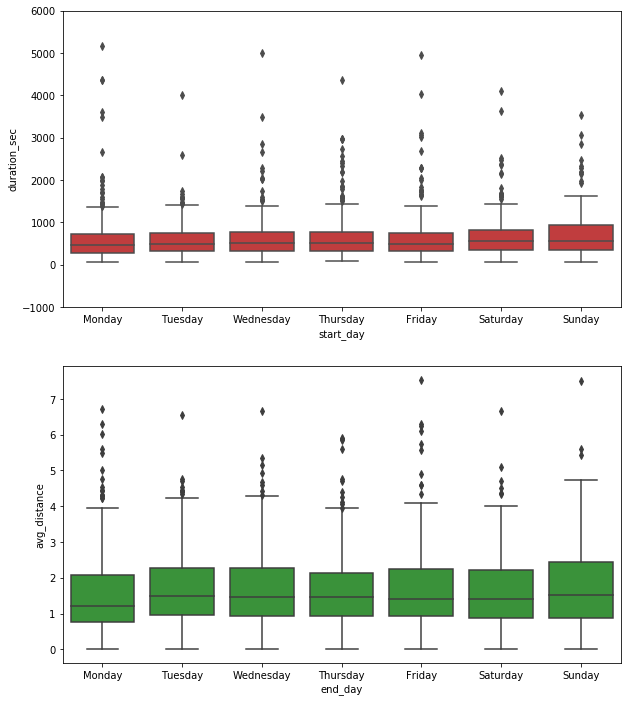

In [28]:

df_sample = df.sample(2000)
fig,ax = plt.subplots(2, figsize=(10,12))

sb.boxplot(data=df_sample, x='start_day', y='duration_sec', color = color, ax=ax[0])
sb.boxplot(data=df_sample, x='end_day', y='avg_distance', color = color1, ax=ax[1])

ax[0].set_ylim([-1000, 6000])
plt.show()

## Observations
Interestingly, it appears that there is a positive relationships between the trip duration and days of the week.

The average trip durations increases from monday through Sunday

## What is the relationship between ride duration and User_type?

## Visualisation

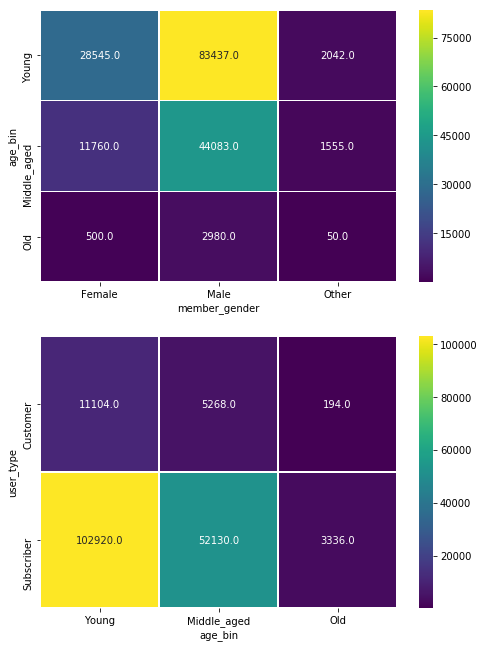

In [29]:
plt.figure(figsize = [8, 17])


ax1= plt.subplot(3, 1, 1)
dd= df.groupby(['age_bin', 'member_gender'])['start_station_id'].count().unstack()
sb.heatmap(dd, cmap='viridis', linewidths=0.30,annot=True, fmt='.1f', ax=ax1)

# subplot 2: age_bin vs. user_type
ax = plt.subplot(3, 1, 2)
# sb.countplot(data = df, hue = 'age_bin', x = 'user_type', palette = 'Greens')
dg= df.groupby(['user_type', 'age_bin'])['start_station_id'].count().unstack()
sb.heatmap(dg, cmap='viridis',linewidths=0.30, annot=True, fmt='.1f', ax=ax);



## Observations
- Most of the bike trips are taken by male young people (20-35yrs)
- Only Young Subscriber are Confident enough to share their trips
- We can deduce that bike sharing varies amongst subscribers. There is no dynamism in Customers using the bikes at any week day.


In [30]:
df.user_type.value_counts().index

Index(['Subscriber', 'Customer'], dtype='object')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Customers and Male riders ride for a much longer period

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Longest Rides are recorded on saturday

## Multivariate Exploration


## Is there a correlation between Trip Duration, Trip Distance and User Type?

## Visualization

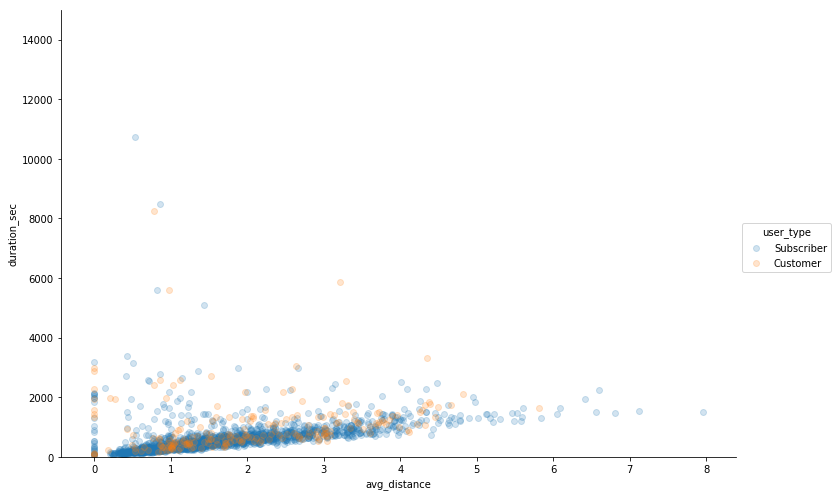

In [31]:

df_sam = df.sample(2000)
sb.lmplot(x='avg_distance', y='duration_sec', data = df_sam, fit_reg=False,
          hue='user_type',scatter_kws={"alpha":0.2,}, size=7, aspect=1.5)
plt.ylim(0, 15000);
plt.show()

## Observations
- There is a linear correlation between speed and distance
- THere is no clear demarcation between the user types 

Customers travel very longer distance regardless the day of the week(longest on weekends) whereas subscribers generally travel short distance with litle increase on weekends but not up to that of the customers.

In [32]:
df.groupby(['member_gender', 'bike_share_for_all_trip']).duration_sec.mean()

member_gender  bike_share_for_all_trip
Female         No                          779.508425
               Yes                         772.291319
Male           No                          674.813494
               Yes                         650.726725
Other          No                         1025.466489
               Yes                         867.103395
Name: duration_sec, dtype: float64

## Is there a correlation between Trip Duration, Gender and Share Trips?

## Visualization

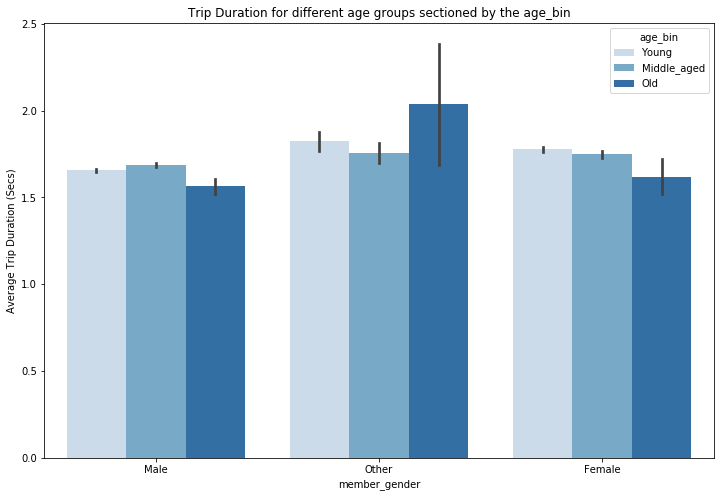

In [33]:
fig = plt.figure(figsize = [12, 8])
ax = sb.barplot(data = df, x ='member_gender', y = 'avg_distance', hue = 'age_bin',
           palette = 'Blues')
plt.title('Trip Duration for different age groups sectioned by the age_bin')
plt.ylabel('Average Trip Duration (Secs)')

ax.set_yticklabels([],minor = True)
plt.show();

## Observations
- The other gender group travels for the longest distance followed by female, then, male.
- There is no much difference between the different age groups for the mean time travelled
- There is a high variance for the 95% confidence interval. This might be due to the lack of data in that class


## Is there a correlation between Trip Duration, Gender and User Type?

## Visualization

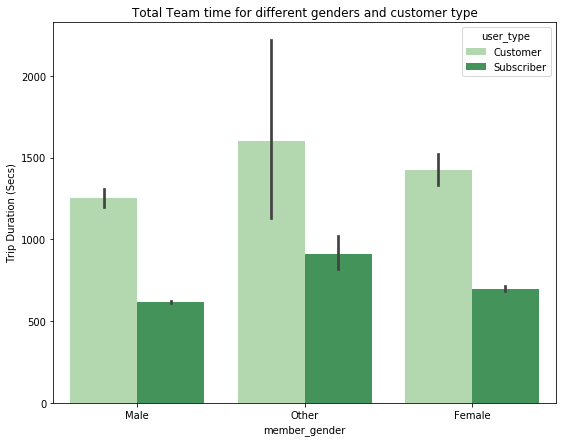

In [34]:
fig = plt.figure(figsize = [9,7])
ax = sb.barplot(data = df, x ='member_gender', y = 'duration_sec', hue = 'user_type',
           palette = 'Greens')
plt.title('Total Team time for different genders and customer type')
plt.ylabel('Trip Duration (Secs)')

plt.show();

## Observations
For both subscribers and customers, the other gender group spent most duration followed by female and then male.
The confidence interval for the other is quite high,This is due to the amount of samples availble to estimate it

## Conclusions

- The dataset is just for the months of February and March 2019

- All trips last on average for roughly 500 seconds.

- Tuesdays and Thursdays were the days of choice for travel.

- Weekends have the fewest records for trips.

- The peak travel times are when people are leaving for work in the morning (8 and 9 hrs.) and returning home in the evening (17 and 18 hrs.

- Subscribers made almost 90% of the journeys.

- For all journeys, just 10% of them involved bike sharing.

- More over 70% of the travelers were men.

- Customers have longer attention spans than subscribers.

- Compared to men, women spend more time.

- Weekend trip lengths are longer than other weekdays'

- Shared bicycles on journeys are only permitted for subscribers.

- The number of journeys every weekday is largely unaffected by the type of customer.

- Regardless of the day of the week, customers travel more distances than subscribers do.


In [35]:
!jupyter nbconvert --to html Ford_exploration_template.ipynb

[NbConvertApp] WARNING | pattern 'Ford_exploration_template.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--debug
    set log level to logging.DEBUG (maximize logging output)
--generate-config
    generate default config file
-y
    Answer yes to any questions instead of prompting.
--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--stdout
    Write notebook o